In [1]:
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt

import os
import glob

from nfl import Player

In [2]:
games = pd.read_csv('data/games.csv')

In [3]:
plays = pd.read_csv('data/plays.csv')

In [4]:
week1 = pd.read_csv('data/week1.csv',parse_dates=['time'])

In [5]:
gameId = games.loc[0,'gameId']

In [6]:
game_plays = plays[plays['gameId'] == gameId]

In [7]:
len(game_plays)

89

In [8]:
game_plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False


In [9]:
play = game_plays.loc[0]

In [10]:
play['playDescription']

'(15:00) M.Ryan pass short right to J.Jones pushed ob at ATL 30 for 10 yards (M.Jenkins).'

In [11]:
play

gameId                                                           2018090600
playId                                                                   75
playDescription           (15:00) M.Ryan pass short right to J.Jones pus...
quarter                                                                   1
down                                                                      1
yardsToGo                                                                15
possessionTeam                                                          ATL
playType                                                     play_type_pass
yardlineSide                                                            ATL
yardlineNumber                                                           20
offenseFormation                                                     I_FORM
personnelO                                                 2 RB, 1 TE, 2 WR
defendersInTheBox                                                         7
numberOfPass

In [12]:
play_data = week1[(week1['gameId']==play['gameId'])&(week1['playId']==play['playId'])]

In [13]:
play_data.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,2018-09-07 01:07:14.599000+00:00,91.73,26.67,0.00,0.01,0.02,289.57,240.93,None,310.0,Matt Ryan,2.0,QB,1,away,2018090600,75,left,NaN
1,2018-09-07 01:07:14.599000+00:00,88.89,36.47,0.01,0.01,0.01,105.63,66.66,None,79848.0,Malcolm Jenkins,27.0,SS,1,home,2018090600,75,left,NaN
2,2018-09-07 01:07:14.599000+00:00,91.35,44.16,0.02,0.03,0.01,290.45,16.86,None,2495454.0,Julio Jones,11.0,WR,1,away,2018090600,75,left,HITCH
3,2018-09-07 01:07:14.599000+00:00,86.31,22.01,0.09,0.42,0.01,70.12,168.91,None,2495613.0,Corey Graham,24.0,FS,1,home,2018090600,75,left,NaN
4,2018-09-07 01:07:14.599000+00:00,90.78,36.15,0.00,0.00,0.00,257.61,193.97,None,2533040.0,Mohamed Sanu,12.0,WR,1,away,2018090600,75,left,HITCH


In [14]:
play_data['frameId'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59])

In [15]:
init_pos = play_data[play_data['frameId']==1]

In [16]:
init_pos

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,2018-09-07 01:07:14.599000+00:00,91.73,26.67,0.00,0.01,0.02,289.57,240.93,None,310.0,Matt Ryan,2.0,QB,1,away,2018090600,75,left,NaN
1,2018-09-07 01:07:14.599000+00:00,88.89,36.47,0.01,0.01,0.01,105.63,66.66,None,79848.0,Malcolm Jenkins,27.0,SS,1,home,2018090600,75,left,NaN
2,2018-09-07 01:07:14.599000+00:00,91.35,44.16,0.02,0.03,0.01,290.45,16.86,None,2495454.0,Julio Jones,11.0,WR,1,away,2018090600,75,left,HITCH
3,2018-09-07 01:07:14.599000+00:00,86.31,22.01,0.09,0.42,0.01,70.12,168.91,None,2495613.0,Corey Graham,24.0,FS,1,home,2018090600,75,left,NaN
4,2018-09-07 01:07:14.599000+00:00,90.78,36.15,0.00,0.00,0.00,257.61,193.97,None,2533040.0,Mohamed Sanu,12.0,WR,1,away,2018090600,75,left,HITCH
5,2018-09-07 01:07:14.599000+00:00,73.64,28.70,0.03,0.02,0.01,103.05,219.41,None,2534832.0,Rodney McLeod,23.0,FS,1,home,2018090600,75,left,NaN
6,2018-09-07 01:07:14.599000+00:00,98.25,26.63,0.01,0.01,0.00,265.88,194.51,None,2543583.0,Devonta Freeman,24.0,RB,1,away,2018090600,75,left,NaN
7,2018-09-07 01:07:14.599000+00:00,86.48,31.12,0.09,0.03,0.04,95.90,33.36,None,2552315.0,Jordan Hicks,58.0,MLB,1,home,2018090600,75,left,NaN
8,2018-09-07 01:07:14.599000+00:00,82.67,20.53,0.03,0.07,0.01,81.14,174.57,None,2552689.0,Ronald Darby,21.0,CB,1,home,2018090600,75,left,NaN
9,2018-09-07 01:07:14.599000+00:00,84.00,43.49,0.14,0.05,0.01,108.23,110.32,None,2555383.0,Jalen Mills,31.0,CB,1,home,2018090600,75,left,NaN


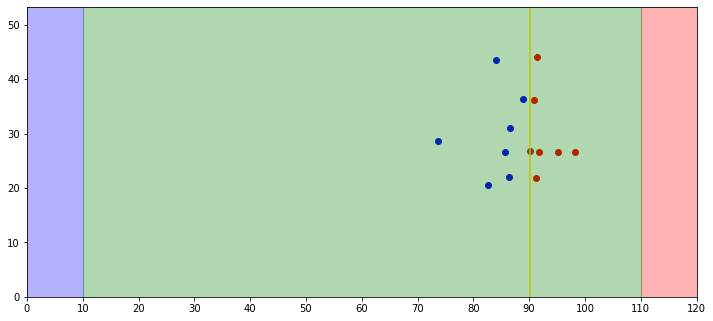

In [43]:
fig,ax = plt.subplots(figsize=(12,5.33))

ax.axvspan(0,10,color='b',alpha=.3)
ax.axvspan(110,120,color='r',alpha=.3)
ax.axvspan(10,110,color='g',alpha=.3)

for i in range(init_pos.shape[0]):
    target = init_pos.loc[i]
    if target['team'] == 'home':
        color = 'b'
    elif target['team'] == 'away':
        color = 'r'
    elif target['team'] == 'football':
        color = 'brown'
        ax.axvline(target['x'],color='y')
    ax.scatter(target['x'],target['y'],color=color)

ax.set_xlim(0,120)
ax.set_ylim(0,53.3)

ax.set_xticks(np.arange(0,121,10))

plt.show()

In [18]:
fb_data = play_data[play_data['displayName']=='Football']

In [19]:
fb_data = fb_data.sort_values(by='frameId')

In [20]:
player_data = play_data[play_data['nflId'].notna()]

In [21]:
home_player_data = player_data[player_data['team']=='home']
away_player_data = player_data[player_data['team']=='away']

In [22]:
home_players = {}
away_players = {}

In [23]:
for nflId in home_player_data['nflId'].unique():
    _player_data = player_data[player_data['nflId'] == nflId]
    _player_data = _player_data.sort_values(by='frameId')
    home_players[str(int(nflId))] = Player(int(nflId), _player_data)

In [24]:
for nflId in away_player_data['nflId'].unique():
    _player_data = player_data[player_data['nflId'] == nflId]
    _player_data = _player_data.sort_values(by='frameId')
    away_players[str(int(nflId))] = Player(int(nflId), _player_data)